## Quadrotor

In [1]:
using TrajectoryOptimization
using Plots, LinearAlgebra

Import the quadrotor model

In [2]:
model = Dynamics.quadrotor_model
n = model.n # number of states
m = model.m; # number of controls

Define numerical type

In [3]:
T = Float64;

Define initial and goals states

In [4]:
q0 = [1.;0.;0.;0.] # unit quaternion

x0 = zeros(T,n)
x0[1:3] = [0.; 0.; 0.]
x0[4:7] = q0

xf = zero(x0)
xf[1:3] = [0.;50.;0.]
xf[4:7] = q0;

Define a cost function, e.g., quadratic

In [5]:
Q = (1.0e-2)*Diagonal(I,n)
R = (1.0e-2)*Diagonal(I,m)
Qf = 1000.0*Diagonal(I,n)
cost = LQRCost(Q, R, Qf, xf);

Define a problem

In [6]:
N = 101 # number of knot points
dt = 0.1 # total time

U = [0.5*9.81/4.0*ones(m) for k = 1:N-1] # initial hovering control trajectory
obj = Objective(cost,N) # objective with same stagewise costs

prob = Problem(model,obj, x0=x0, integration=:rk4, N=N, dt=dt)
initial_controls!(prob,U); # initialize problem with controls

Solve problem

In [7]:
solve!(prob, iLQRSolverOptions{T}(verbose=true)) # solve with iLQR

    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    1     703132.9107   546879.622  1         0.25      0e+00     5.47e+05  4.578341 0          
    2     1.825021468   703131.089  1         1         0e+00     7.03e+05  5.701603 0          
    3     1.7854130328  0.04615526  0.858156  1         0e+00     0.039608  0.069744 0          
    4     1.7826522359  0.00442376  0.624083  1         0e+00     0.002761  0.032963 0          
    5     1.7823317827  0.00114365  0.280203  1         0e+00     0.00032   0.009248 0          
    6     1.7822654992  0.00065422  0.101317  1         0e+00     6.63e-05  0.0041   0          


1.7822654992402744

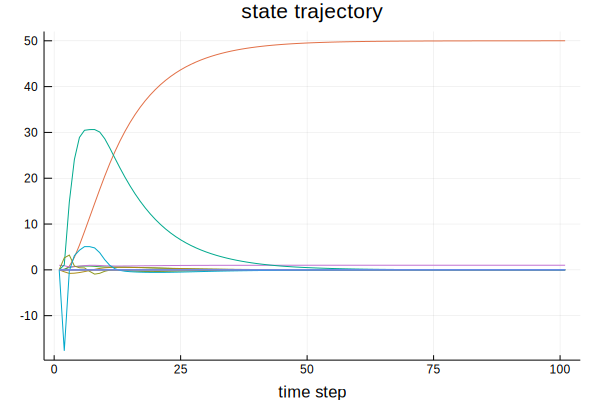

In [8]:
plot(prob.X,xlabel="time step",legend=:none,title="state trajectory")

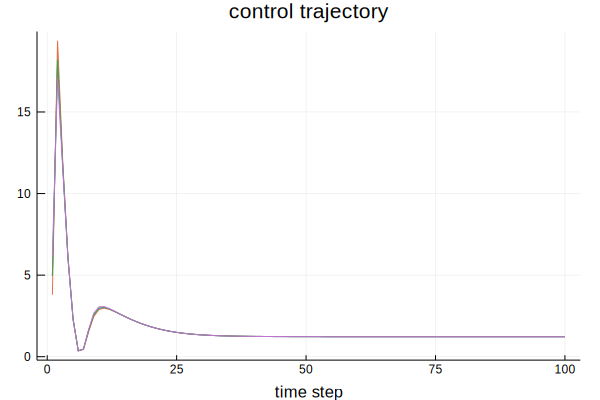

In [9]:
plot(prob.U,xlabel="time step",legend=:none,title="control trajectory")